# Playground

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import sklearn.cluster
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2

In [2]:
import json

In [3]:
def load_repo_data():
    filename = '../data/raw_api_data.json'
    jdata = json.loads(open(filename, 'r').read())
    return jdata
    

In [4]:
sample = load_repo_data()

In [5]:
features = ['forks_count', 'network_count', 'open_issues_count', 'size', 'stargazers_count', 'subscribers_count', 'watchers_count']

def feats(repo_list):
    def extract_features(repo_record, features=features):
        def value_or_nan(key):
            if key in repo_record:
                return repo_record[key]
            else:
                return np.NaN
        return [value_or_nan(f) for f in features]

    a = np.ones((len(repo_list), len(features)))
    
    for i, repo in enumerate(repo_list):
        a[i] = extract_features(repo)

    return a

In [6]:
overview = pd.DataFrame(data=feats(sample['data']), columns=features)
labelNames = np.array(sample['labelNames'])
labels = np.array(sample['labels'])
overview['Y'] = labelNames[labels]
overview['Y'] = labels
overview = overview[overview['forks_count'].isnull() == False]
overview

,forks_count,network_count,open_issues_count,size,stargazers_count,subscribers_count,watchers_count,Y
0,2.0,2.0,0.0,226.0,6.0,1.0,6.0,0
1,7823.0,7823.0,622.0,55512.0,8073.0,1125.0,8073.0,0
2,9258.0,9258.0,651.0,143188.0,52628.0,3698.0,52628.0,0
3,341.0,341.0,135.0,29623.0,2203.0,61.0,2203.0,0
4,1553.0,1553.0,935.0,79615.0,2658.0,228.0,2658.0,0
5,0.0,0.0,1.0,2064.0,0.0,1.0,0.0,1
6,28.0,28.0,1.0,518.0,70.0,25.0,70.0,1
7,23.0,23.0,2.0,16773.0,7.0,7.0,7.0,1
9,7.0,7.0,4.0,7.0,0.0,2.0,0.0,1
10,22829.0,22829.0,88.0,1083379.0,2292.0,762.0,2292.0,2


In [7]:
import seaborn as sbn

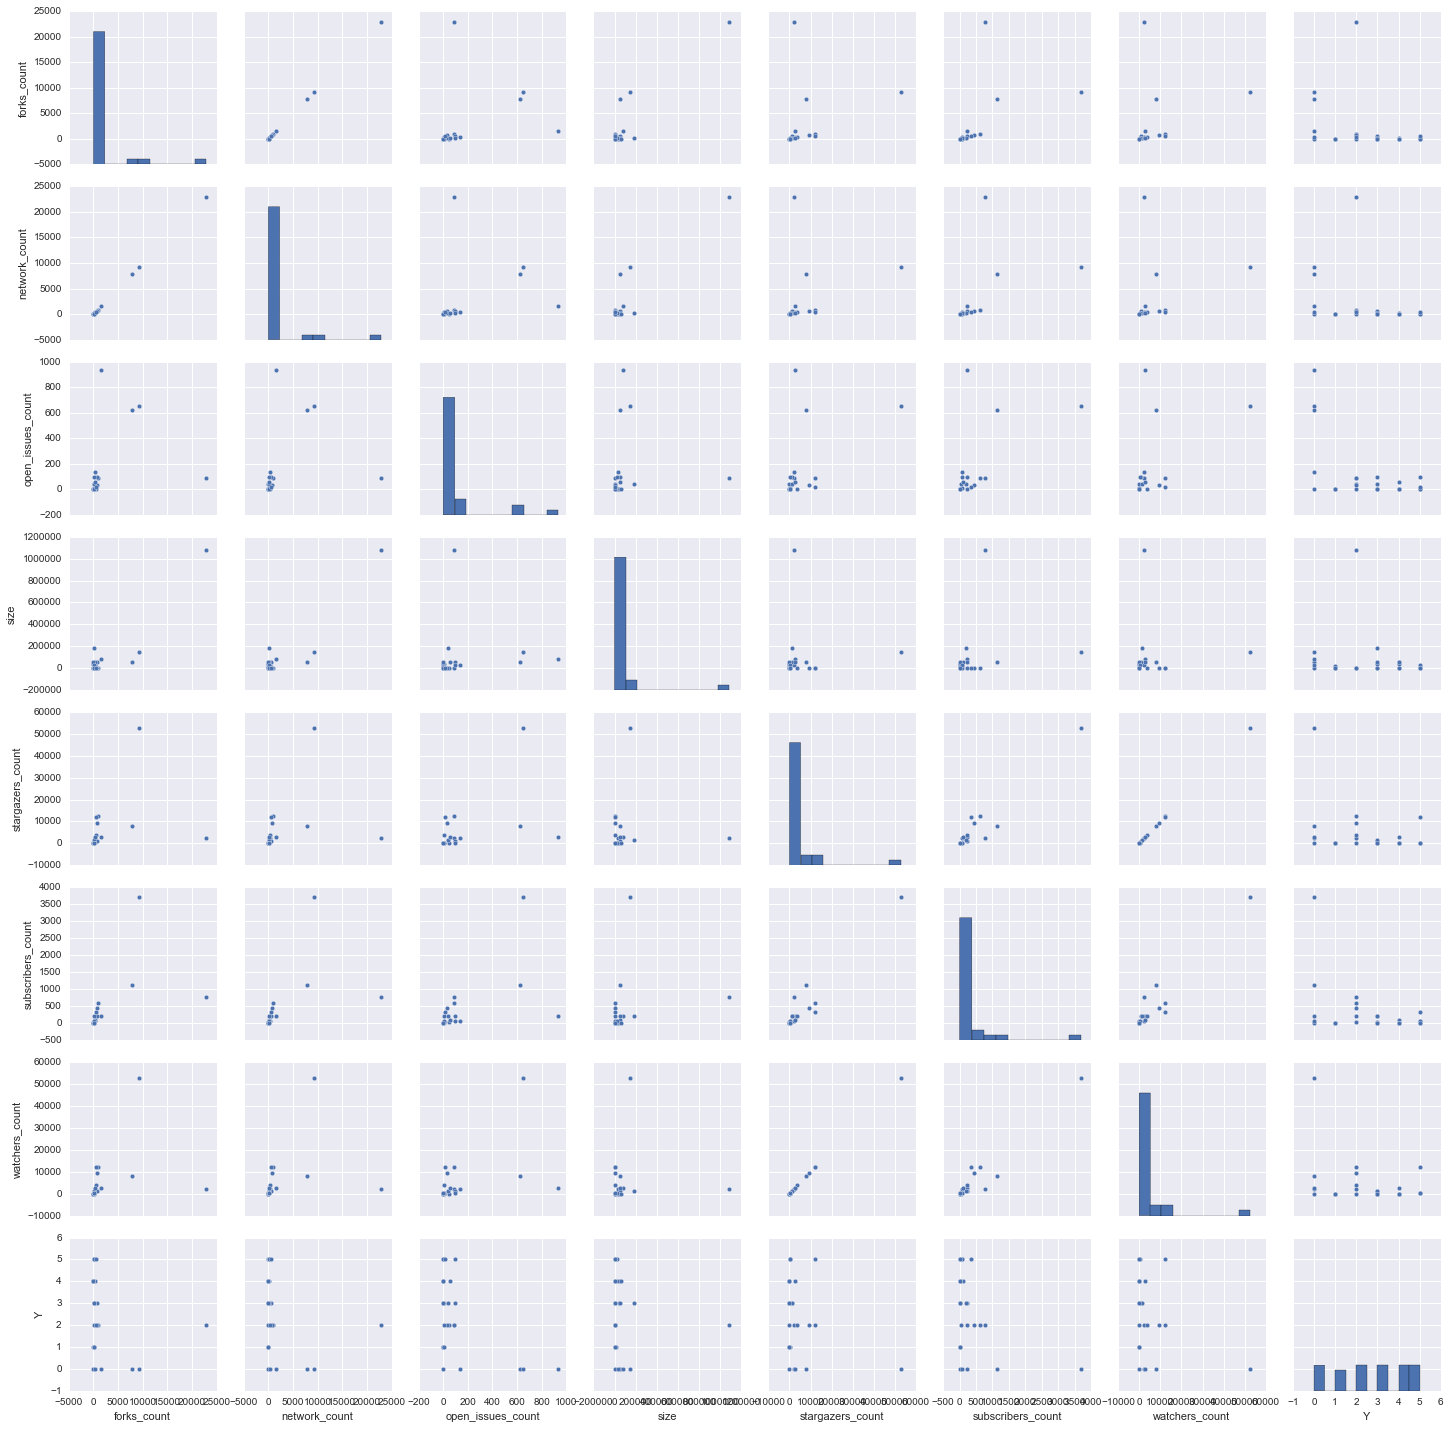

In [8]:
sbn.pairplot(overview)

## Iris Dataset Clustering Example

In [9]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
Y = iris.target

df_X = pd.DataFrame(X)
df_X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### sklearn k means

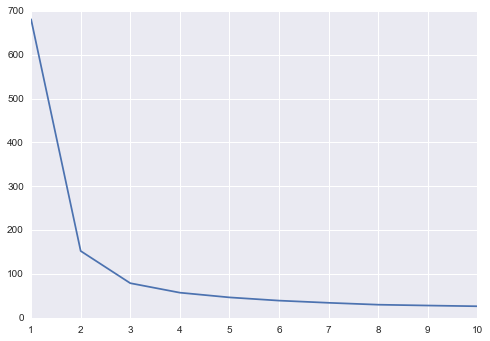

In [10]:
dists = []
for i in range(10):
    means, labels, sum_dist = sklearn.cluster.k_means(X, i+1)
    dists.append(sum_dist)
dists
plt.plot(np.arange(10) + 1,dists)

In [11]:
kMeans = sklearn.cluster.KMeans(n_clusters=6)

In [12]:
kMeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [13]:
kMeans.predict(X)

array([1, 5, 5, 5, 1, 1, 5, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 1, 5, 5, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5,
       1, 5, 1, 5, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 4, 2, 2, 0, 4, 3, 0, 0, 3, 2, 3, 0, 3, 0, 0, 0, 4, 0,
       0, 0, 3, 3, 4, 0, 4, 3, 4, 0, 3, 4, 4, 0, 3, 3, 3, 0, 4, 4, 3, 0, 0,
       4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4], dtype=int32)

In [14]:
kMeans.score(X)

-38.930963049672059

### scipy k means

In [15]:
means, Y_form_kmeans = kmeans2(X, 3)
Y_form_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [16]:
d = {}
for x in range(3):
    for y in range(3):
        k = '{:d}{:d}'.format(x, y)
        d[k] = 0

for i, t in enumerate(zip(Y, Y_form_kmeans)):
    y, y_km = t
    d['{:d}{:d}'.format(y, y_km)] += 1

In [17]:
compare = pd.DataFrame({'orig': Y, 'guessed': Y_form_kmeans})
compare['equal'] = compare['orig'] == compare['guessed']
print(len(compare[compare['equal'] == True]), len(compare))

13 150
